# Import Libraries

In [50]:
import numpy as np
import pandas as pd
from  sklearn.model_selection  import  train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [51]:
df = pd.read_csv('TransformedDataset/transformed_user_summary_segemented_v2.csv')

In [52]:
df.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,is_discount,BestPlan,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,...,Percent_Songs_Played_100,is_churn,RecencyCluster,FrequencyCluster,MonetaryCluster,SongsPlayedFrequencyCluster,OverallScore,Segment,Plan,drop
0,187,1788,219,410,0,0,410,12,48210.151,364,...,23.739586,1,1,2,2,0,5,Mid-Value,Yearly,0
1,501,1788,263,410,0,0,410,12,50496.753,167,...,91.490592,1,1,2,2,0,5,Mid-Value,Yearly,0
2,2184,1788,239,410,0,0,410,14,36132.039,212,...,59.349542,1,1,2,2,0,5,Mid-Value,Yearly,0
3,3550,1788,210,410,0,0,410,13,42064.803,157,...,54.224399,1,1,2,2,0,5,Mid-Value,Yearly,0
4,4465,1788,278,410,0,0,410,18,65668.010,312,...,83.163338,1,1,2,2,0,5,Mid-Value,Yearly,0


In [54]:
df=df.drop('drop',axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36403 entries, 0 to 36402
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   msno                                 36403 non-null  int64  
 1   Monetary                             36403 non-null  int64  
 2   Recency                              36403 non-null  int64  
 3   Frequency                            36403 non-null  int64  
 4   is_auto_renew                        36403 non-null  int64  
 5   is_discount                          36403 non-null  int64  
 6   BestPlan                             36403 non-null  int64  
 7   active_days_per_month                36403 non-null  int64  
 8   total_usage_time_per_month           36403 non-null  float64
 9   total_unique_songs_played_per_month  36403 non-null  int64  
 10  Percent_Songs_Played_25              36403 non-null  float64
 11  Percent_Songs_Played_50     

Drop Columns

In [60]:
df=df.drop(['BestPlan','is_churn','RecencyCluster','FrequencyCluster','MonetaryCluster','SongsPlayedFrequencyCluster','OverallScore','drop'], axis=1)

In [61]:
df.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,is_discount,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,Percent_Songs_Played_25,Percent_Songs_Played_50,Percent_Songs_Played_100,Segment,Plan
0,187,1788,219,410,0,0,12,48210.151,364,38.219879,32.594632,23.739586,Mid-Value,Yearly
1,501,1788,263,410,0,0,12,50496.753,167,5.246362,0.847763,91.490592,Mid-Value,Yearly
2,2184,1788,239,410,0,0,14,36132.039,212,30.018644,4.863348,59.349542,Mid-Value,Yearly
3,3550,1788,210,410,0,0,13,42064.803,157,26.032263,13.086911,54.224399,Mid-Value,Yearly
4,4465,1788,278,410,0,0,18,65668.010,312,10.476203,3.174253,83.163338,Mid-Value,Yearly


In [62]:
df['Plan'].value_counts()

Monthly         34496
Yearly            889
Six Months        611
Three Months      342
Name: Plan, dtype: int64

In [56]:
df['drop']=0
df.loc[(df['Plan']=='Daily') | (df['Plan']=='Weekly'),'drop'] = 1

In [58]:
index_names = df[ df['drop'] == 1 ].index

In [59]:
df.drop(index_names, inplace = True)

# Label encoding and Test Train Split

In [63]:
X = df.drop('Plan',axis=1)
y= df['Plan']

In [64]:
objList = X.select_dtypes(include = "object").columns #
print (objList)

Index(['Segment'], dtype='object')


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for Shiv in objList:
    X[Shiv] = le.fit_transform(X[Shiv].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36338 entries, 0 to 36402
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   msno                                 36338 non-null  int64  
 1   Monetary                             36338 non-null  int64  
 2   Recency                              36338 non-null  int64  
 3   Frequency                            36338 non-null  int64  
 4   is_auto_renew                        36338 non-null  int64  
 5   is_discount                          36338 non-null  int64  
 6   active_days_per_month                36338 non-null  int64  
 7   total_usage_time_per_month           36338 non-null  float64
 8   total_unique_songs_played_per_month  36338 non-null  int64  
 9   Percent_Songs_Played_25              36338 non-null  float64
 10  Percent_Songs_Played_50              36338 non-null  float64
 11  Percent_Songs_Played_100    

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

# Building Plan Prediction Model

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train) #training data and  has been provided to the algorithm

knn.score(X_train,y_train)#the data we are passing will be considered for the accuracy


print("Accuracy on training set: {:.2f}".format(knn.score(X_train, y_train)*100))

print("Accuracy on testing set: {:.2f}".format(knn.score(X_test, y_test)*100))

Accuracy on training set: 95.26
Accuracy on testing set: 94.90


In [70]:
y_pred = knn.predict(X_test)

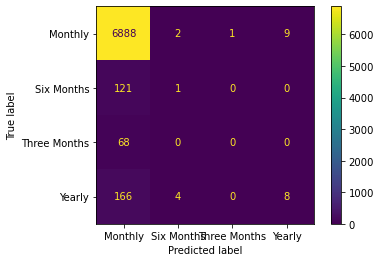

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [73]:
precision_score(y_test, y_pred, average='weighted')

0.9167590370700663

In [74]:
recall_score(y_test, y_pred, average='weighted')

0.9489543203082004

In [75]:
f1_score(y_test, y_pred, average='weighted')

0.9270014989687293

In [90]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

# Random Forest Classifier

In [94]:
forest = RandomForestClassifier(n_estimators=2)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.993


In [95]:
y_pred = forest.predict(X_test)

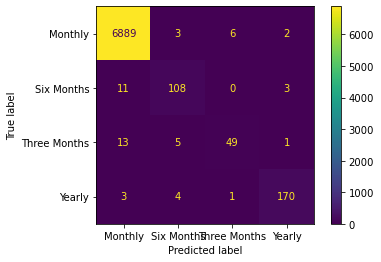

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [97]:
precision_score(y_test, y_pred, average='weighted')

0.9926106607091023

In [98]:
recall_score(y_test, y_pred, average='weighted')

0.9928453494771602

In [99]:
f1_score(y_test, y_pred, average='weighted')

0.9926550568132878

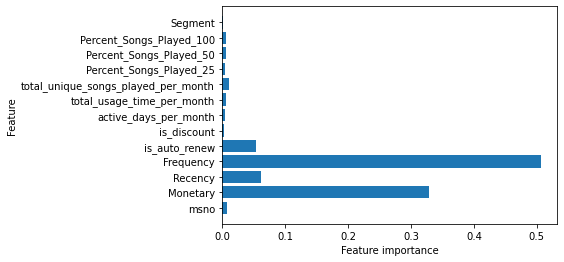

In [100]:
plot_feature_importances(forest)

# Gradient Boosting Classifier

In [102]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.3,max_depth=7)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("GBRT Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.987
GBRT Accuracy on test set: 0.981


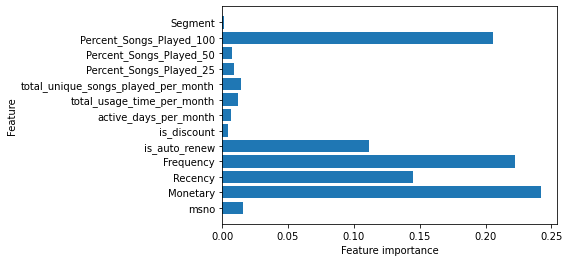

In [103]:
plot_feature_importances(gbrt)

In [104]:
y_pred = forest.predict(X_test)

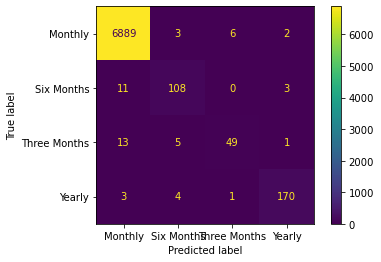

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [106]:
precision_score(y_test, y_pred, average='weighted')

0.9926106607091023

In [107]:
recall_score(y_test, y_pred, average='weighted')

0.9928453494771602

In [108]:
f1_score(y_test, y_pred, average='weighted')

0.9926550568132878

### Exporting Results

In [134]:
dataToPredict = df

In [135]:
result = pd.DataFrame()

In [136]:
result['msno']=dataToPredict['msno']

In [137]:
dataToPredict = dataToPredict.drop(['Plan'],axis=1)

In [138]:
dataToPredict['Segment'] = le.fit_transform(dataToPredict['Segment'].astype(str))

In [139]:
result['Plan'] = gbrt.predict(dataToPredict)

In [140]:
prediction_of_probability = gbrt.predict_proba(dataToPredict)

In [141]:
result['Yearly'] = prediction_of_probability[:,3]

In [142]:
result['ThreeMonths'] = prediction_of_probability[:,2]

In [143]:
result['SixMonths'] = prediction_of_probability[:,1]

In [144]:
result['Monthly'] = prediction_of_probability[:,0]

In [145]:
result.head()

,msno,Plan,Yearly,ThreeMonths,SixMonths,Monthly
0,187,Yearly,1.0,5.378309e-16,9.618449e-12,7.478511e-15
1,501,Yearly,1.0,4.544101e-15,2.663593e-11,3.309442e-15
2,2184,Yearly,1.0,3.824104e-15,1.331874e-11,7.226672e-15
3,3550,Yearly,1.0,4.831649e-13,3.813251e-07,1.262527e-14
4,4465,Yearly,1.0,6.073017e-13,3.804050e-07,1.100728e-14


In [146]:
result.shape

(36338, 6)

In [147]:
result.to_csv('ResultDataset/result_plan.csv',index=False)